In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import RidgeCV
from dense_nn_class import DLN_Network
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LassoCV
import lightgbm as lgbm
from xgboost import XGBRegressor



estimators = [
    ("ada", AdaBoostRegressor(**{'learning_rate': 0.021546607451827543, 'n_estimators': 74, 'random_state': 872, 'loss': 'linear'})),
    ("gbr", XGBRegressor(**{'max_depth': 10, 'learning_rate': 0.07547737476917998, 'n_estimators': 511, 'min_child_weight': 8, 'gamma': 0.5040721967680127, 'subsample': 0.8037499605646387, 'colsample_bytree': 0.7390517324360482, 'reg_alpha': 0.07237873956441068, 'reg_lambda': 0.3158987021349957, 'random_state': 174})),
    #("lgbm", lgbm.LGBMRegressor(**{'learning_rate': 0.08296453124126314, 'n_estimators': 916, 'random_state': 876, 'loss': 'linear'})),
    ("cat", CatBoostRegressor(**{'objective': 'MAE', 'colsample_bylevel': 0.08393035401844894, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 3.6491381658313076, "random_seed":0})),
    ("kn", KNeighborsRegressor())
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=lgbm.LGBMRegressor(),
    cv=10,
    verbose=1,
    passthrough=True,
)

In [7]:
%store -r dm 
dm = dm 

In [8]:
dm.combine_all_data()

['X_test_estimated_a', 'data_A']
['X_test_estimated_b', 'data_B']
['X_test_estimated_c', 'data_C']


In [29]:
from sklearn.model_selection import train_test_split 

X = dm.data.iloc[:, 2:]
X["week_number"] = X["week_number"].astype(float)
y = dm.data.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_submission = dm.X_test_estimated[dm.X_test_estimated.columns.intersection(X.columns)]
X_submission["week_number"] = X_submission["week_number"].astype(float)
cols = X.columns
num_cols = [i for i in range(0, X.shape[1])]
X.columns = num_cols
X_submission.columns = num_cols

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_submission.shape)

(36588, 48) (36588,) (12196, 48) (12196,) (2160, 48)


/var/folders/r_/m51x_wn949x1s34wqwqf6hkr0000gn/T/ipykernel_24340/3347976846.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_submission["week_number"] = X_submission["week_number"].astype(float)


In [10]:

reg.fit(X, y)

0:	learn: 505.5505325	total: 72.7ms	remaining: 1m 12s
1:	learn: 492.3153829	total: 86ms	remaining: 42.9s
2:	learn: 486.9120917	total: 89.7ms	remaining: 29.8s
3:	learn: 484.0482636	total: 91.6ms	remaining: 22.8s
4:	learn: 470.9342977	total: 104ms	remaining: 20.8s
5:	learn: 458.7405190	total: 115ms	remaining: 19.1s
6:	learn: 453.8372489	total: 126ms	remaining: 17.9s
7:	learn: 442.2988865	total: 139ms	remaining: 17.2s
8:	learn: 431.5169759	total: 159ms	remaining: 17.5s
9:	learn: 421.0892324	total: 173ms	remaining: 17.1s
10:	learn: 411.2654416	total: 184ms	remaining: 16.6s
11:	learn: 401.2168273	total: 197ms	remaining: 16.2s
12:	learn: 391.5081729	total: 209ms	remaining: 15.9s
13:	learn: 381.9919497	total: 219ms	remaining: 15.4s
14:	learn: 372.6941626	total: 230ms	remaining: 15.1s
15:	learn: 364.5202049	total: 241ms	remaining: 14.8s
16:	learn: 361.1615767	total: 253ms	remaining: 14.6s
17:	learn: 358.0377499	total: 266ms	remaining: 14.5s
18:	learn: 350.7162931	total: 270ms	remaining: 13.9s


StackingRegressor(cv=10,
                  estimators=[('ada',
                               AdaBoostRegressor(learning_rate=0.021546607451827543,
                                                 n_estimators=74,
                                                 random_state=872)),
                              ('gbr',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.7390517324360482,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            featu...
                                            n_estimators=511, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=174, ...)),
                              ('lgbm',
                               LGBMRegressor(learning_rate=0.08296453124126314,
                                             loss='linear', n_estimators=916,
                                             random_state=876)),
                              ('cat',
                               <catboost.core.CatBoostRegressor object at 0x1483e2d90>),
                              ('forest', RandomForestRegressor())],
                  final_estimator=LinearRegression(), passthrough=True,
                  verbose=1)

In [26]:
## Specify the model to be used
import numpy as np
import pandas as pd

pred = reg.predict(X_submission)

pred = pd.DataFrame(pred.reshape((3*720,)))


pred[pred<0] = 0

# NAME THE FILE 
pred.to_csv("stack_5.csv")

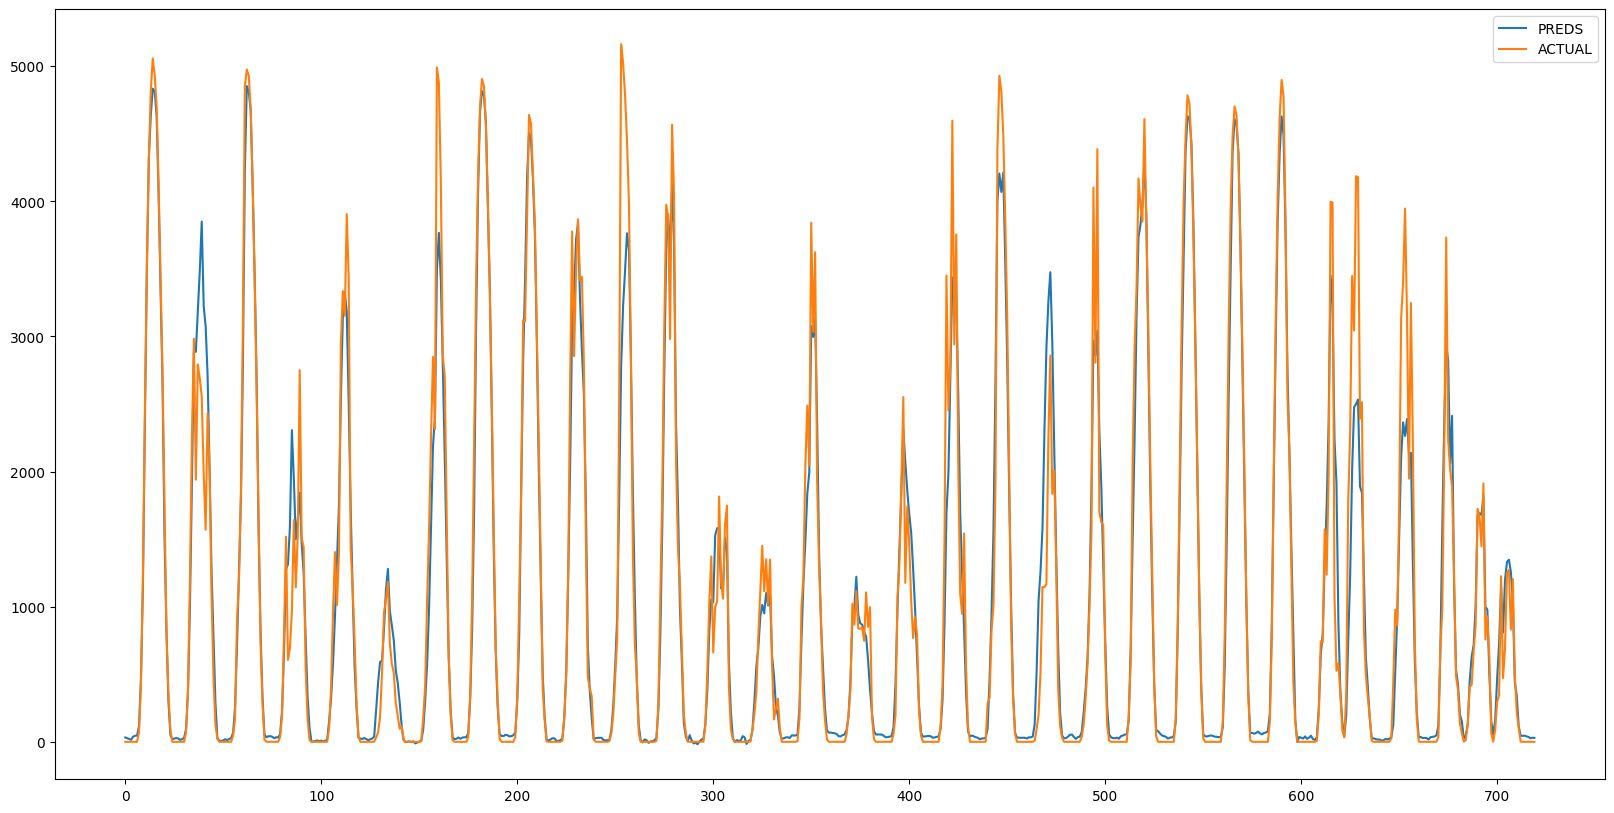

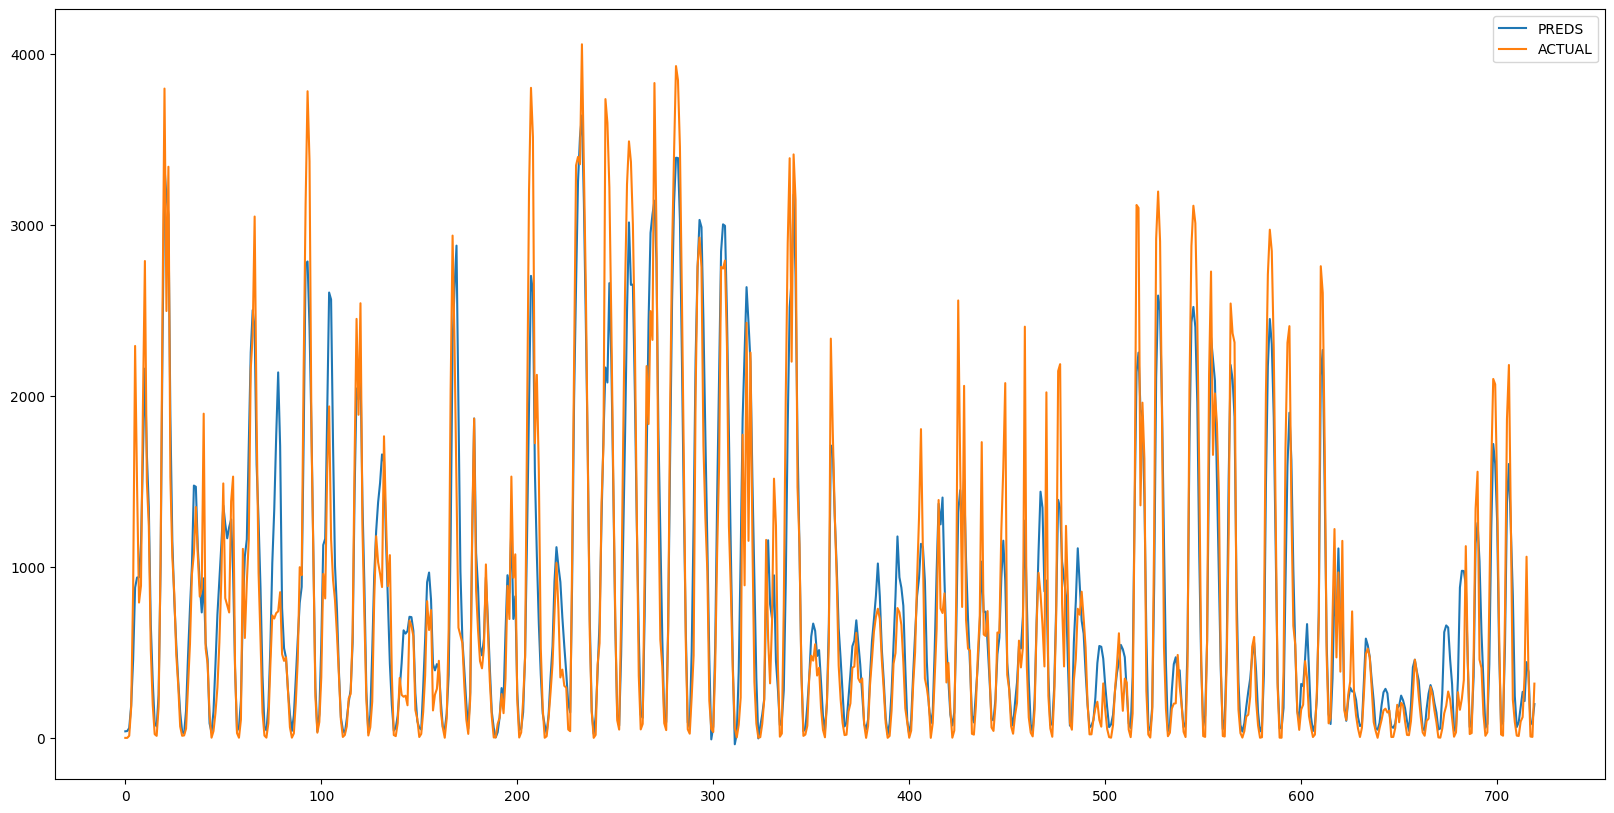

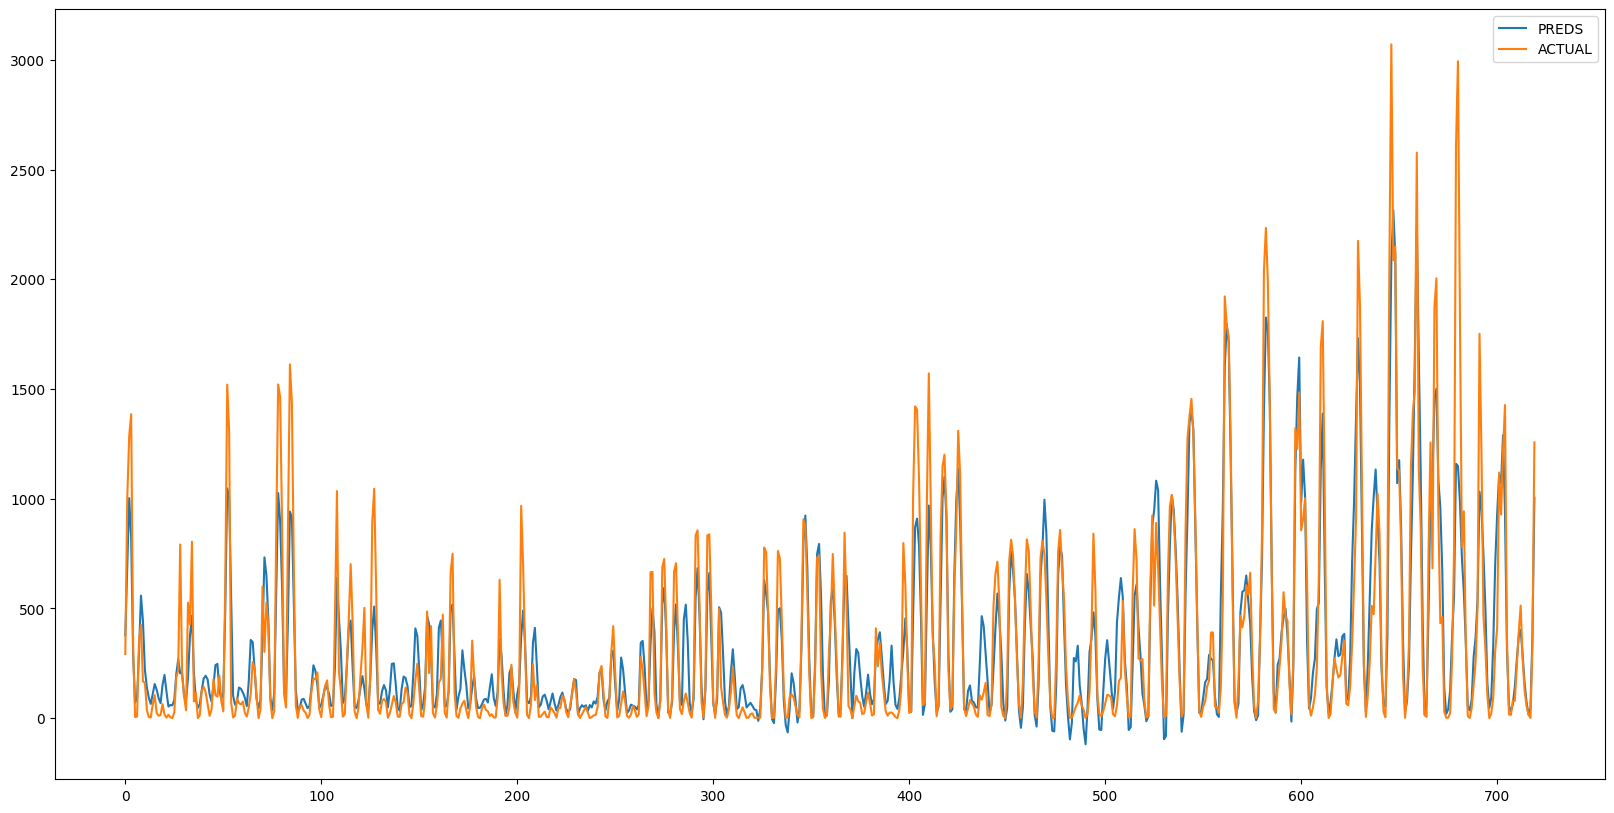

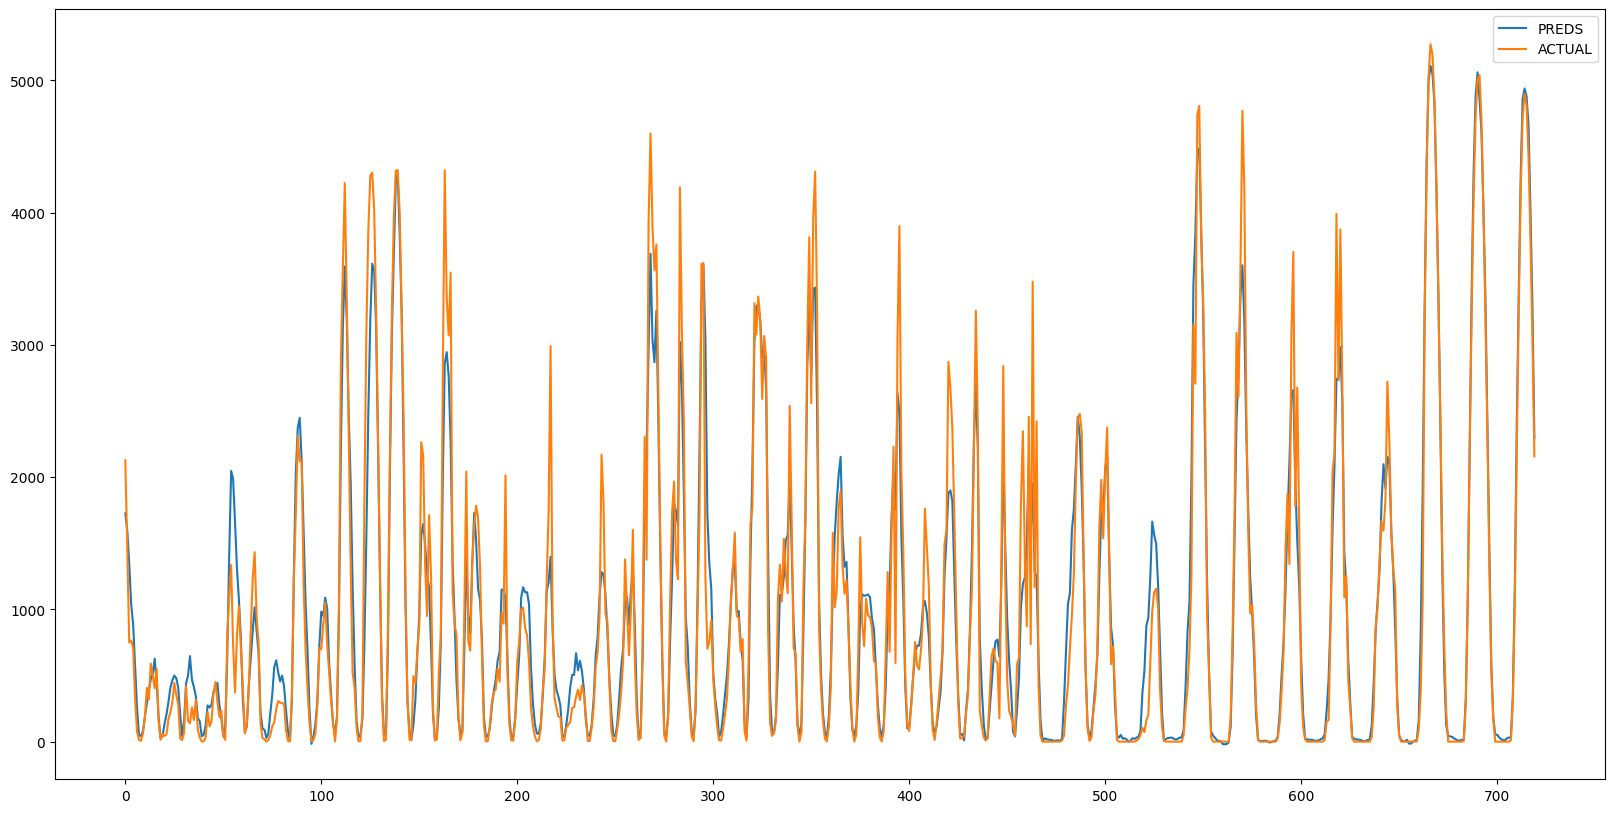

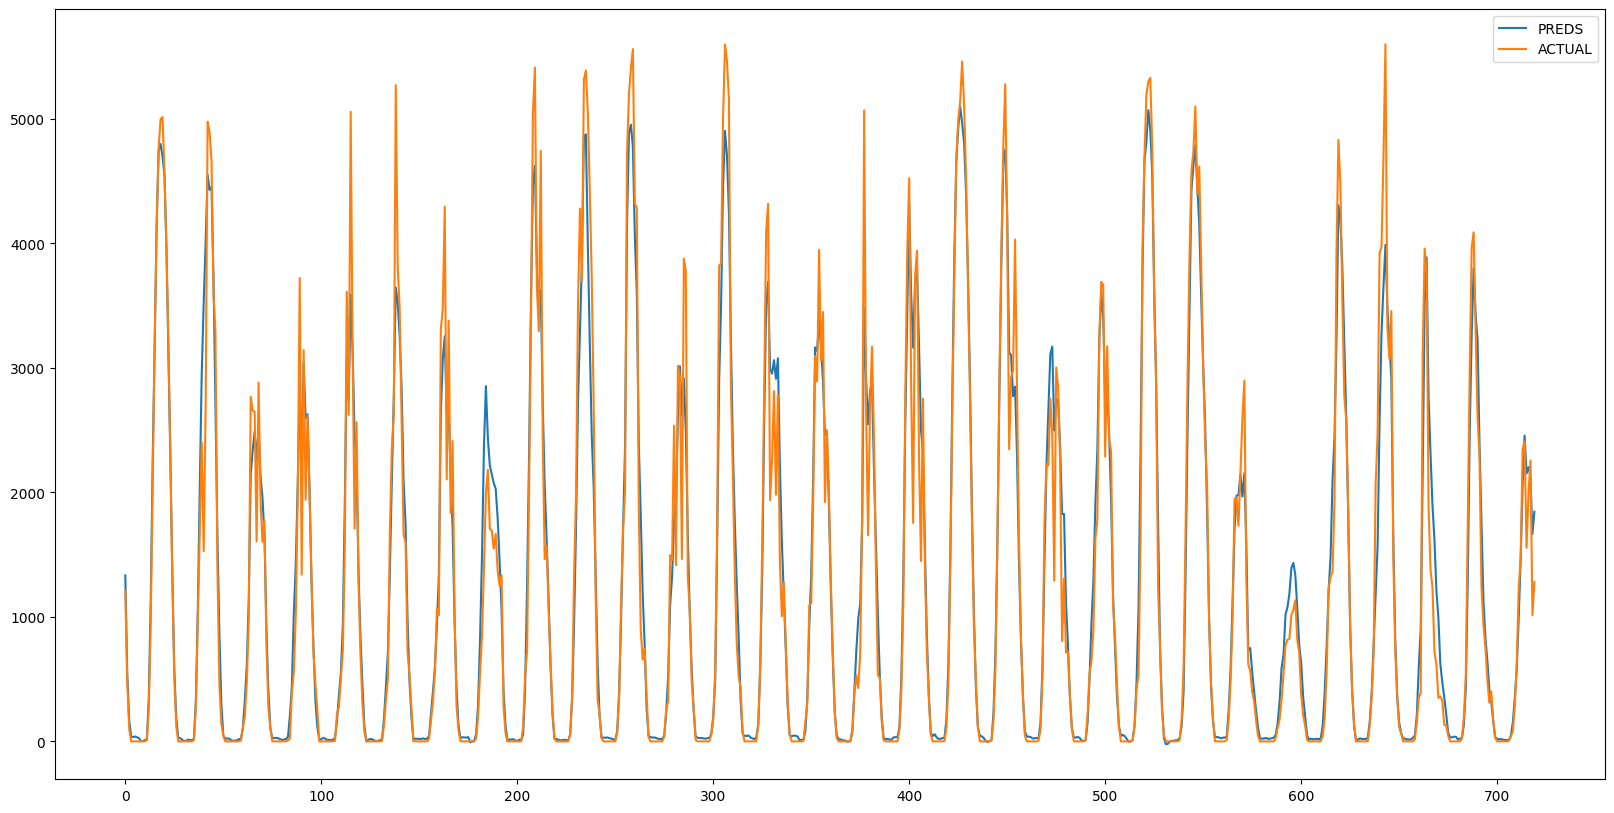

In [30]:
import matplotlib.pyplot as plt

x = np.arange(0, 720, 1)

for i in range(10, 15): 

    y_mid_preds = reg.predict(X.iloc[i*720:(i+1)*720])

    y_mid_actual = y.iloc[i*720:(i+1)*720]

    fig, axs = plt.subplots(1, 1, figsize=(20, 10))
    plt.plot(x, y_mid_preds, label="PREDS")
    plt.plot(x, y_mid_actual, label="ACTUAL")
    plt.legend()
    plt.show()




In [44]:
goodpred = pd.read_csv("log_sub_4.csv") # 154.98
bestpred = pd.read_csv("catboost_1.csv") # 152.69
from sklearn.metrics import mean_absolute_error

def compare_new(newpred):
    good_best = mean_absolute_error(goodpred['prediction'], bestpred['prediction'])
    print('mae between good and best: ', good_best)
    good_new = mean_absolute_error(goodpred['prediction'], newpred['prediction'])
    print('mae between good and new: ', good_new)
    best_new = mean_absolute_error(bestpred['prediction'], newpred['prediction'])
    print('mae between best and new: ', best_new)

    new_better = best_new < good_new and good_new > good_best

    return new_better

newpred = pd.read_csv("catboost_4.csv")
print('new is better:',compare_new(newpred))

mae between good and best:  58.72995223783157
mae between good and new:  66.07532421459617
mae between best and new:  56.44328267046195
new is better: True


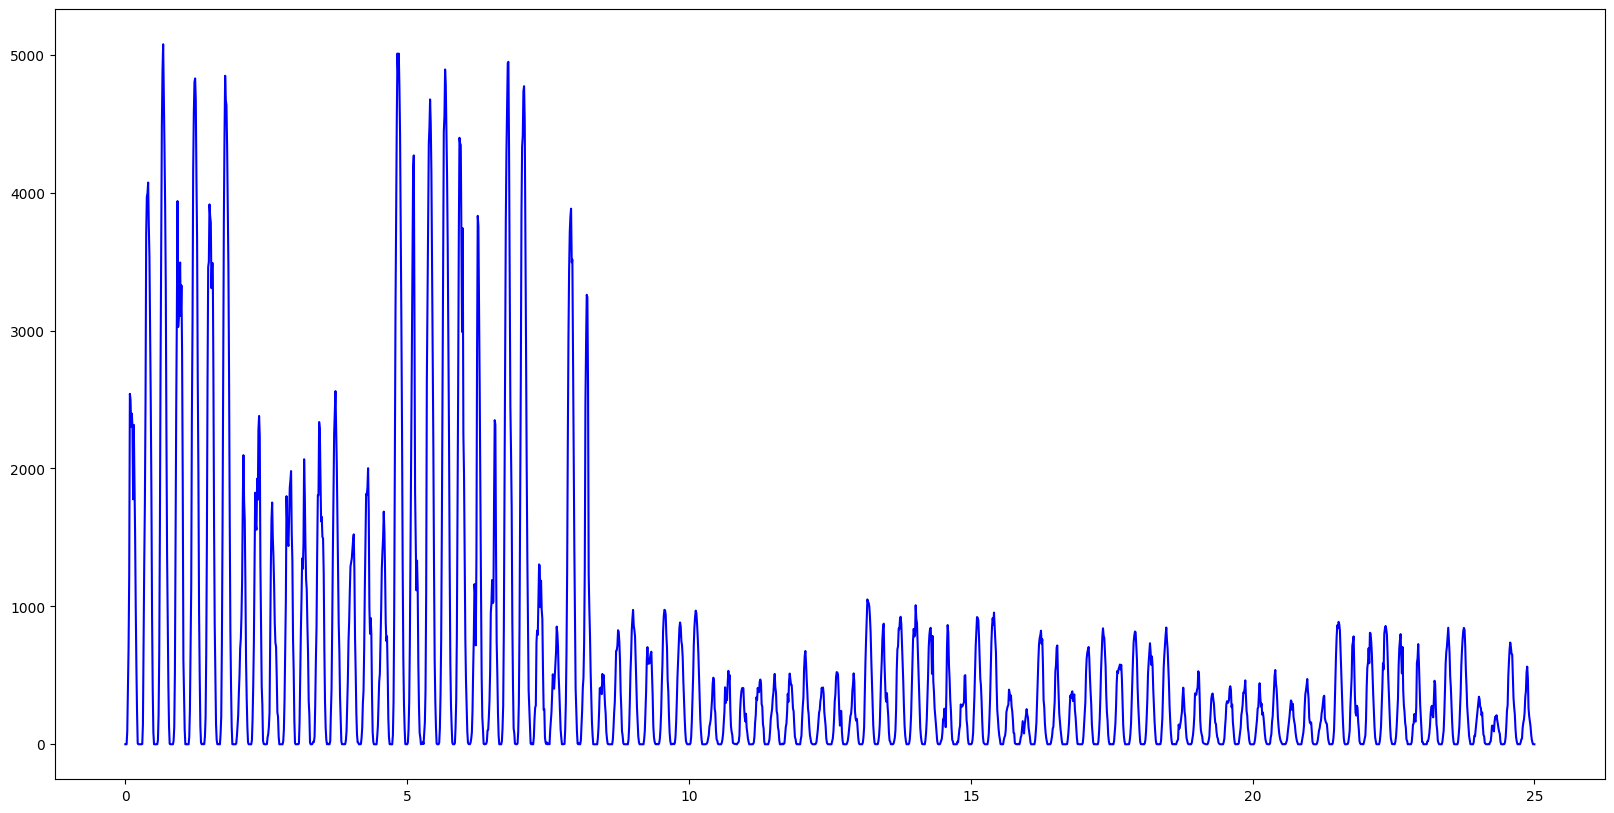

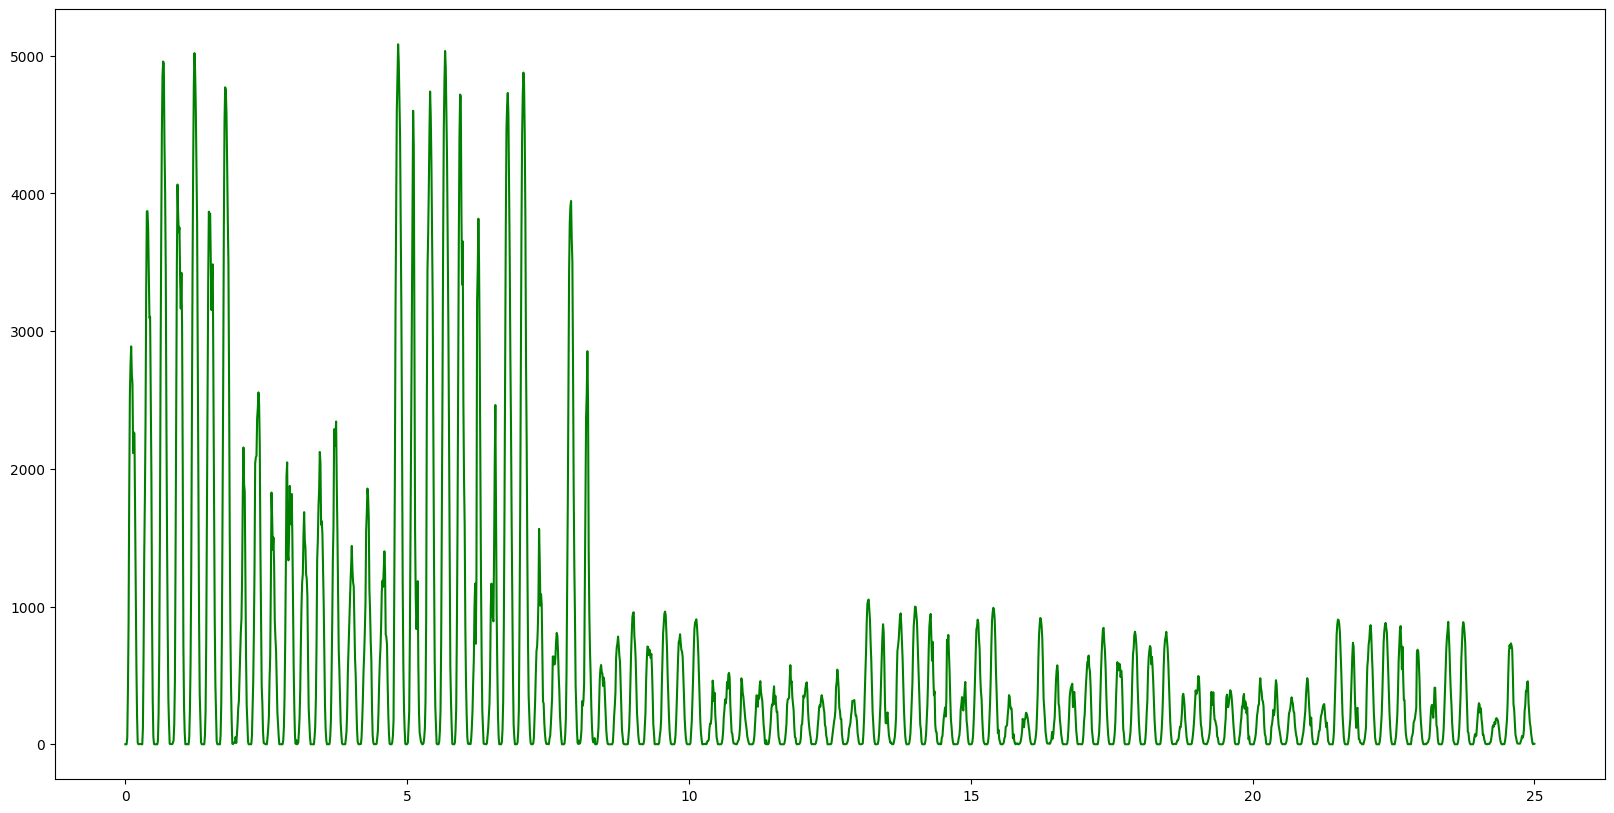

44.32661643424465
45.923729362880486
30.7439953136374
best vs stack5:  26.118441907586107
best vs log4:  29.364976118915784
stack5 vs log4:  25.97821702416659
------------------------------------------------------------------------------------
cat2 vs best:  28.143453298499814
cat2 vs stack5:  35.356957855269634
cat2 vs log4:  38.065270839295955
------------------------------------------------------------------------------------
cat3 vs best:  41.47133855748234
cat3 vs stack5:  43.62317671142585
cat3 vs log4:  44.39563971266245
------------------------------------------------------------------------------------
cat4 vs best:  28.221641335230974
cat4 vs stack5:  29.600843589202704
cat4 vs log4:  33.03766210729808
------------------------------------------------------------------------------------
cat10 vs best:  26.983914809246965
cat10 vs stack5:  31.957089699052105
cat10 vs log4:  32.4875361609463
------------------------------------------------------------------------------------
cat

In [4]:
import matplotlib.pyplot as plt 
import csv 
import numpy as np 
import pandas as pd
from sklearn.metrics import mean_absolute_error
stack1_pred = pd.read_csv("stack_1.csv")
stack2_pred = pd.read_csv("stack_2.csv")
stack3_pred = pd.read_csv("stack_3.csv")
stack5_pred = pd.read_csv("stack_5.csv")
cat2_pred = pd.read_csv("catboost_2.csv")
cat3_pred = pd.read_csv("catboost_3.csv")
cat4_pred = pd.read_csv("catboost_4.csv")
cat10_pred = pd.read_csv("catboost_10.csv")
cat11_pred = pd.read_csv("catboost_11.csv")
cat12_pred = pd.read_csv("catboost_12.csv")
cat13_pred = pd.read_csv("catboost_13_single.csv")
log4_pred = pd.read_csv("log_sub_4.csv")
best_pred = pd.read_csv("catboost_1.csv")

diff = pd.DataFrame(stack2_pred) - pd.DataFrame(best_pred)

x = np.linspace(0, 25, 3*720)
y = [] 
  
with open('catboost_13_single.csv','r') as csvfile: 
    plots = csv.reader(csvfile, delimiter = ',') 

    plots.__next__()
    i = 1
      
    for row in plots: 
        y.append(float(row[1])) 
        # i += 1

        # if ( i == 721): 
        #     break
            
        
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
plt.plot(x, y, color = 'b', label="sub 81") 
# plt.legend()


y2 = []

with open('catboost_1.csv','r') as csvfile: 
    plots = csv.reader(csvfile, delimiter = ',') 

    plots.__next__()
    i = 1
      
    for row in plots: 
        y2.append(float(row[1])) 
        # i += 1

        # if ( i == 721): 
        #     break
            
        
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
plt.plot(x, y2, color = 'g', label="BEST SUB") 

#plt.legend() 
plt.show()


print(mean_absolute_error(best_pred, stack1_pred))
print(mean_absolute_error(best_pred, stack2_pred))
print(mean_absolute_error(best_pred, stack3_pred))
print("best vs stack5: ",mean_absolute_error(best_pred, stack5_pred))
print("best vs log4: ", mean_absolute_error(best_pred, log4_pred))
print("stack5 vs log4: ", mean_absolute_error(stack5_pred, log4_pred))
print("------------------------------------------------------------------------------------")
print("cat2 vs best: ", mean_absolute_error(best_pred, cat2_pred))
print("cat2 vs stack5: ", mean_absolute_error(stack5_pred, cat2_pred))
print("cat2 vs log4: ", mean_absolute_error(log4_pred, cat2_pred))
print("------------------------------------------------------------------------------------")
print("cat3 vs best: ", mean_absolute_error(best_pred, cat3_pred))
print("cat3 vs stack5: ", mean_absolute_error(stack5_pred, cat3_pred))
print("cat3 vs log4: ", mean_absolute_error(log4_pred, cat3_pred))
print("------------------------------------------------------------------------------------")
print("cat4 vs best: ", mean_absolute_error(best_pred, cat4_pred))
print("cat4 vs stack5: ", mean_absolute_error(stack5_pred, cat4_pred))
print("cat4 vs log4: ", mean_absolute_error(log4_pred, cat4_pred))
print("------------------------------------------------------------------------------------")
print("cat10 vs best: ", mean_absolute_error(best_pred, cat10_pred))
print("cat10 vs stack5: ", mean_absolute_error(stack5_pred, cat10_pred))
print("cat10 vs log4: ", mean_absolute_error(log4_pred, cat10_pred))
print("------------------------------------------------------------------------------------")
print("cat11 vs best: ", mean_absolute_error(best_pred, cat11_pred))
print("cat11 vs stack5: ", mean_absolute_error(stack5_pred, cat11_pred))
print("cat11 vs log4: ", mean_absolute_error(log4_pred, cat11_pred))
print("------------------------------------------------------------------------------------")
print("cat12 vs best: ", mean_absolute_error(best_pred, cat12_pred))
print("cat12 vs stack5: ", mean_absolute_error(stack5_pred, cat12_pred))
print("cat12 vs log4: ", mean_absolute_error(log4_pred, cat12_pred))
print("------------------------------------------------------------------------------------")
print("cat13 vs best: ", mean_absolute_error(best_pred, cat13_pred))
print("cat13 vs stack5: ", mean_absolute_error(stack5_pred, cat13_pred))
print("cat13 vs log4: ", mean_absolute_error(log4_pred, cat13_pred))
print("cat13 vs cat12: ", mean_absolute_error(cat12_pred, cat13_pred))